<a href="https://colab.research.google.com/github/Abhinav-ai-debug/AIML-2025/blob/main/AIML__Lab_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from sklearn.datasets import make_blobs
X,y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.50, random_state=0)

In [ ]:
X.shape

(300, 2)

In [ ]:
y_true.shape

(300,)

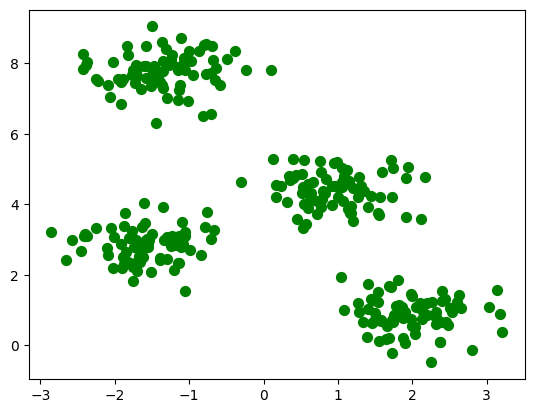

In [ ]:
plt.scatter(X[:,0],X[:,1],s=50,color='green')

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans=KMeans(n_clusters=4)

In [ ]:
kmeans.fit(X)

KMeans(n_clusters=4)

In [ ]:
y_kmeans=kmeans.predict(X)

In [ ]:
centers=kmeans.cluster_centers_
centers

array([[-1.57480456,  2.84532424],
       [-1.35241261,  7.76731726],
       [ 1.99469693,  0.8727049 ],
       [ 0.95415778,  4.39985544]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_kmeans,y_true)

0.0

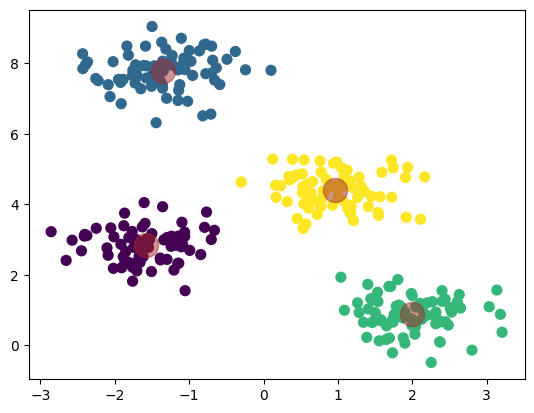

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y_kmeans,s=50,cmap='viridis')
plt.scatter(centers[:,0],centers[:,1],c='brown',s=300,alpha=0.5)

In [ ]:
from sklearn.metrics import pairwise_distances_argmin

In [ ]:
def find_clusters(X,n_clusters,rseed=2):
  rng=np.random.RandomState(rseed)
  i=rng.permutation(X.shape[0])[:n_clusters]
  centers=X[i]
  while True:
    labels=pairwise_distances_argmin(X,centers)
    new_centers=np.array([X[labels==i].mean(0) for i in range(n_clusters)])
    if np.all(centers==new_centers):
      break
    centers=new_centers
  return centers,labels

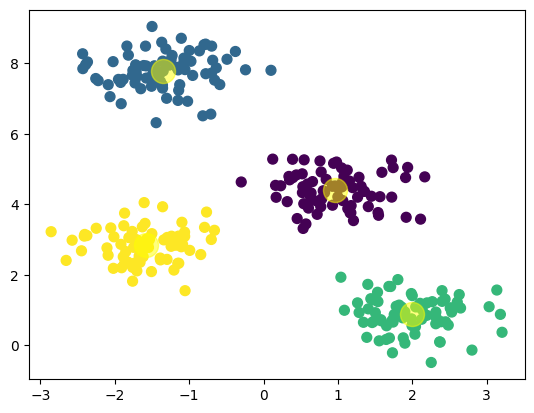

In [ ]:
cenetrs,labels=find_clusters(X,4)
plt.scatter(X[:,0],X[:,1],c=labels,s=50,cmap='viridis')
plt.scatter(centers[:,0],centers[:,1],c='yellow',s=300,alpha=0.5)

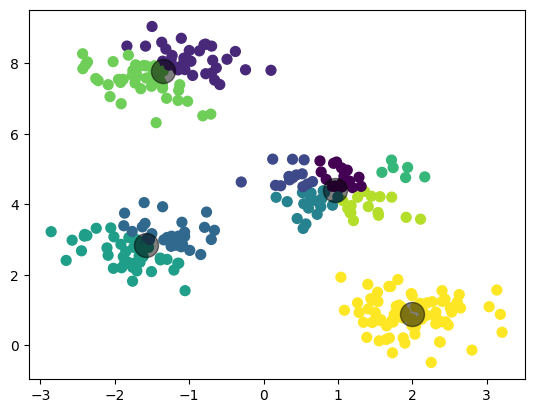

In [ ]:
cenetrs,labels=find_clusters(X,10)
plt.scatter(X[:,0],X[:,1],c=labels,s=50,cmap='viridis')
plt.scatter(centers[:,0],centers[:,1],c='black',s=300,alpha=0.5)

In [ ]:
from sklearn.datasets import make_moons
X,y=make_moons(200,noise=0.03,random_state=0)

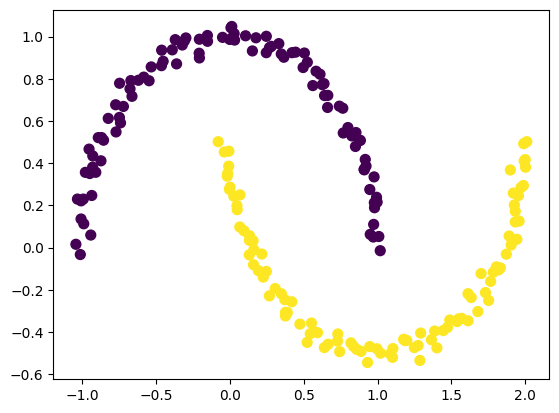

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='viridis')

In [ ]:
labels=KMeans(2,random_state=0,n_init=10).fit_predict(X)

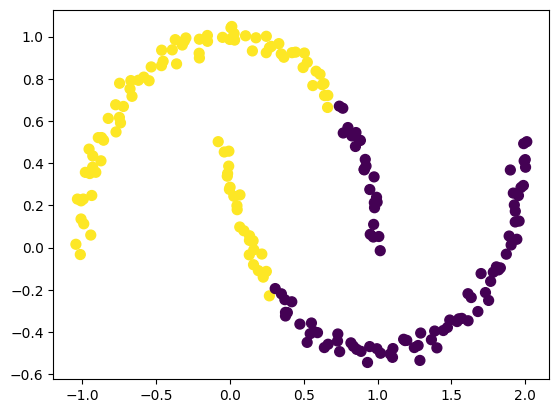

In [ ]:
plt.scatter(X[:,0],X[:,1],c=labels,s=50,cmap='viridis')

In [ ]:
labels=KMeans(2,random_state=0,n_init=10).fit_predict(X)

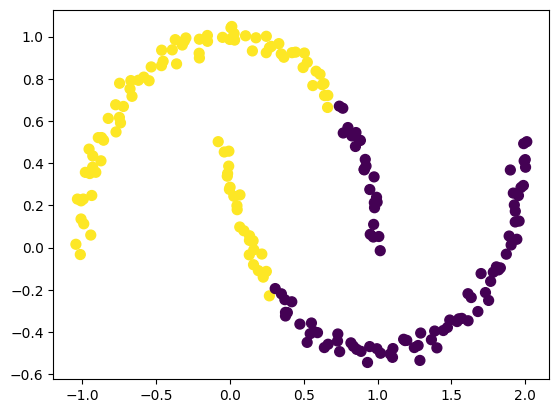

In [ ]:
plt.scatter(X[:,0],X[:,1],c=labels,s=50,cmap='viridis')

In [ ]:
from sklearn.cluster import SpectralClustering

In [ ]:
model=SpectralClustering(n_clusters=2,affinity='nearest_neighbors',assign_labels='kmeans')

In [ ]:
labels=model.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


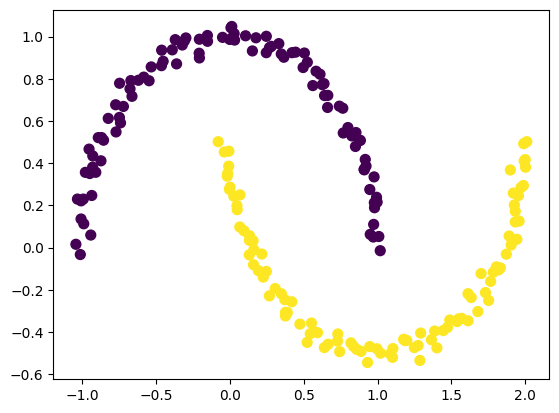

In [ ]:
plt.scatter(X[:,0],X[:,1],c=labels,s=50,cmap='viridis')

In [ ]:
from sklearn.datasets import make_blobs
X,y_true=make_blobs(n_samples=400,centers=4,cluster_std=0.7,random_state=0)
X=X[:,::-1]

In [ ]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist